<a href="https://colab.research.google.com/github/suryaprakashrajkumar/INSE6220/blob/main/Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [2]:
# install slim version (default): if you get an error message, run it again one or more times: 
!pip3 install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.4 MB/s eta 0:00:00


In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


he Dataset used for the anlaysis provides a detailed analysis on the Quality of Diamonds and its associated costs. The Quality of the diamond is directly associated to the design parameters. Inevidently greater the quality of the diamond, greater is the price of the diamond correspondingly. The Dataset consists of 53940 observations and 10 corresponding attributes with the quality of cut as a class to comment on the quality of the dataset.

Every Dimaond manufacured has parameter such as table, width, depth, color, size and carat (Weight).  Using this design attributes a manufacured Diamond can be assigned to a class of quality i.e. cut or based on clarity. Cut is deisgned with the following attributes Fair, Good, Very Good, Premium, Ideal and Clarity to I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best) in the order of worst to best in quality. along with these ttributes there is a associated cost the diamond was sold to a buyer. In this study we assign the class to the cut and the classification is done to predict the quality of the diamonds i.e. cut based on the design attributes.

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/suryaprakashrajkumar/INSE6220/main/diamonds.csv')
df.head(25)

carat        cut color clarity  depth  table  price     x     y     z
0    0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1    0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2    0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4    0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5    0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6    0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8    0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9    0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
10   0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
11   0.23      Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
12   0.22    Premium     F     SI1   60.4   61.0    342  3.88  3.84  2.33
13   0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
14   0.20    Premium     E     SI2   60.2   62.0    345  3.79  3.75  2.27
15   0.32    Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68
16   0.30      Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
17   0.30       Good     J     SI1   63.4   54.0    351  4.23  4.29  2.70
18   0.30       Good     J     SI1   63.8   56.0    351  4.23  4.26  2.71
19   0.30  Very Good     J     SI1   62.7   59.0    351  4.21  4.27  2.66
20   0.30       Good     I     SI2   63.3   56.0    351  4.26  4.30  2.71
21   0.23  Very Good     E     VS2   63.8   55.0    352  3.85  3.92  2.48
22   0.23  Very Good     H     VS1   61.0   57.0    353  3.94  3.96  2.41
23   0.31  Very Good     J     SI1   59.4   62.0    353  4.39  4.43  2.62
24   0.31  Very Good     J     SI1   58.1   62.0    353  4.44  4.47  2.59

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  146


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

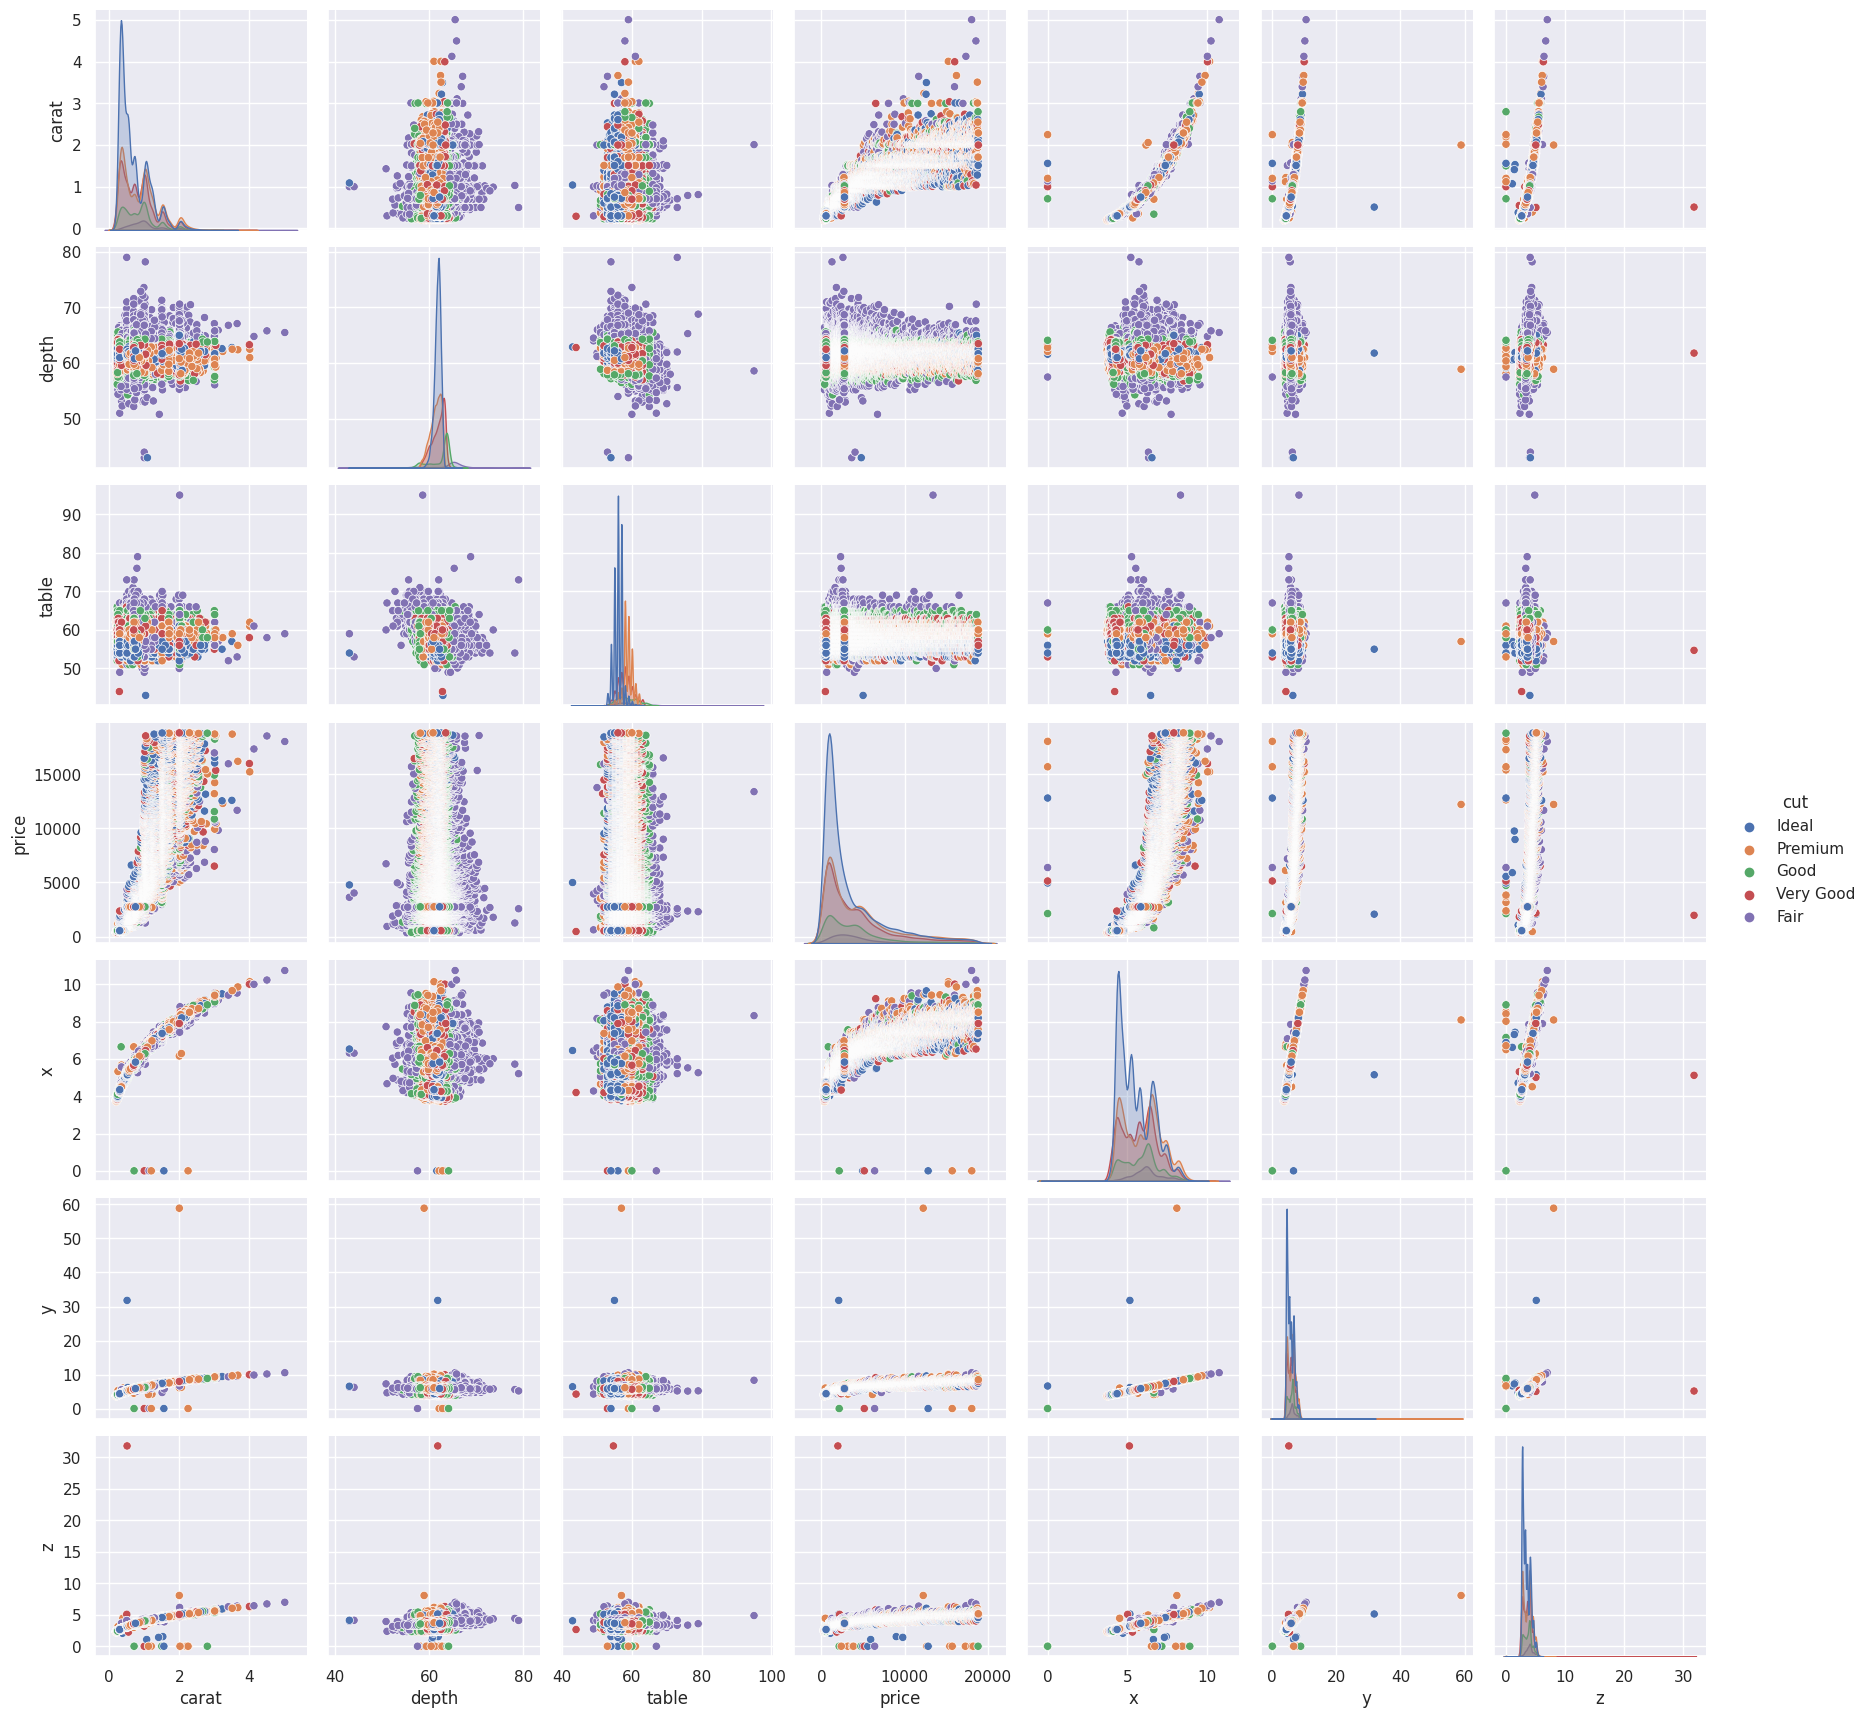

In [10]:
sns.pairplot(df, hue='cut')
plt.show()

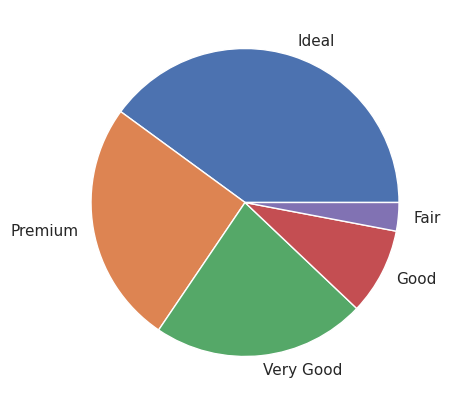

In [11]:
y =df['cut']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [12]:
X = df.drop(columns=['cut','color','clarity'])
X.head(10)

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75
5   0.24   62.8   57.0    336  3.94  3.96  2.48
6   0.24   62.3   57.0    336  3.95  3.98  2.47
7   0.26   61.9   55.0    337  4.07  4.11  2.53
8   0.22   65.1   61.0    337  3.87  3.78  2.49
9   0.23   59.4   61.0    338  4.00  4.05  2.39

In [13]:
X.describe().transpose()

count         mean          std    min     25%      50%      75%  \
carat  53940.0     0.797940     0.474011    0.2    0.40     0.70     1.04   
depth  53940.0    61.749405     1.432621   43.0   61.00    61.80    62.50   
table  53940.0    57.457184     2.234491   43.0   56.00    57.00    59.00   
price  53940.0  3932.799722  3989.439738  326.0  950.00  2401.00  5324.25   
x      53940.0     5.731157     1.121761    0.0    4.71     5.70     6.54   
y      53940.0     5.734526     1.142135    0.0    4.72     5.71     6.54   
z      53940.0     3.538734     0.705699    0.0    2.91     3.53     4.04   

            max  
carat      5.01  
depth     79.00  
table     95.00  
price  18823.00  
x         10.74  
y         58.90  
z         31.80

**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

carat     depth     table     price         x         y         z
0 -1.198168 -0.174092 -1.099672 -0.904095 -1.587837 -1.536196 -1.571129
1 -1.240361 -1.360738  1.585529 -0.904095 -1.641325 -1.658774 -1.741175
2 -1.198168 -3.385019  3.375663 -0.903844 -1.498691 -1.457395 -1.741175
3 -1.071587  0.454133  0.242928 -0.902090 -1.364971 -1.317305 -1.287720
4 -1.029394  1.082358  0.242928 -0.901839 -1.240167 -1.212238 -1.117674
5 -1.177071  0.733344 -0.204605 -0.901589 -1.596752 -1.553707 -1.500277
6 -1.177071  0.384331 -0.204605 -0.901589 -1.587837 -1.536196 -1.514447
7 -1.134878  0.105120 -1.099672 -0.901338 -1.480862 -1.422373 -1.429424
8 -1.219265  2.338808  1.585529 -0.901338 -1.659155 -1.711308 -1.486106
9 -1.198168 -1.639950  1.585529 -0.901087 -1.543264 -1.474906 -1.627811

In [15]:
X.describe().transpose()

count          mean       std        min       25%       50%  \
carat  53940.0  2.444878e-16  1.000009  -1.261458 -0.839523 -0.206621   
depth  53940.0 -3.996902e-15  1.000009 -13.087603 -0.523105  0.035317   
table  53940.0  9.695207e-17  1.000009  -6.470073 -0.652139 -0.204605   
price  53940.0 -9.273676e-17  1.000009  -0.904095 -0.747681 -0.383967   
x      53940.0  2.782103e-16  1.000009  -5.109120 -0.910325 -0.027776   
y      53940.0 -8.430615e-17  1.000009  -5.020931 -0.888280 -0.021474   
z      53940.0 -2.002271e-16  1.000009  -5.014556 -0.890946 -0.012376   

            75%        max  
carat  0.510668   8.886075  
depth  0.523936  12.041392  
table  0.690462  16.801666  
price  0.348787   3.732438  
x      0.721054   4.465203  
y      0.705242  46.549648  
z      0.710318  40.047576

**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

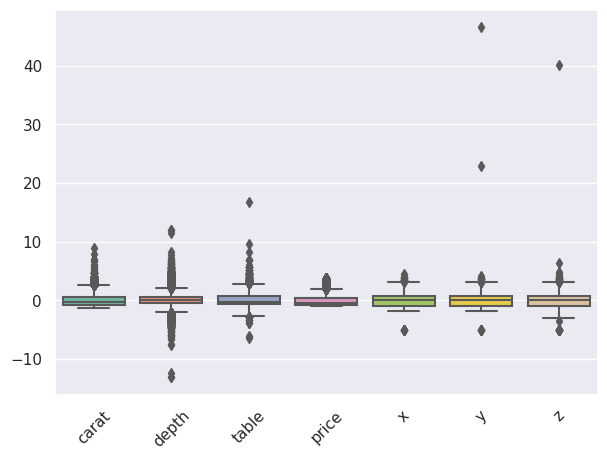

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

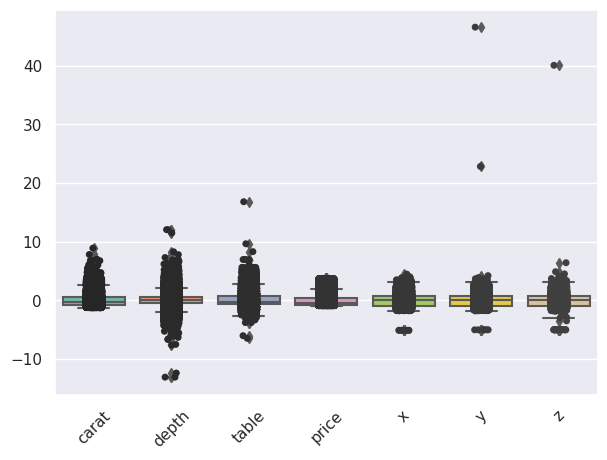

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

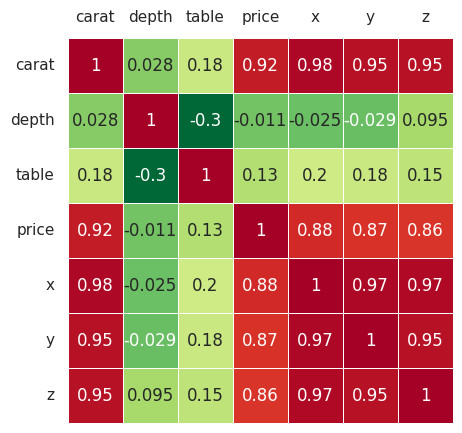

In [19]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

Text(0, 0.5, 'Z2')

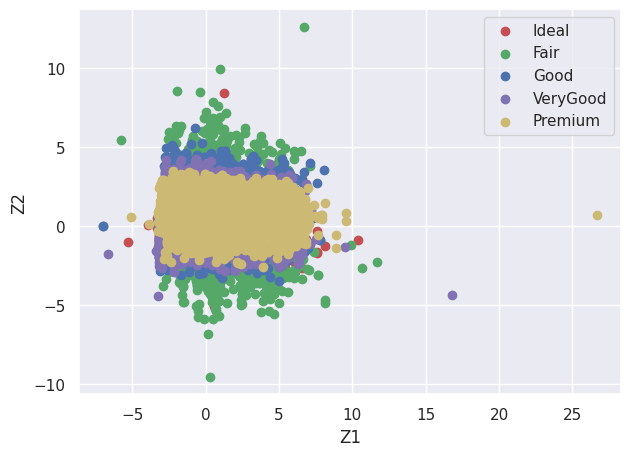

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

idx_Ideal = np.where(y == 'Ideal')
idx_Fair = np.where(y == 'Fair')
idx_Good = np.where(y == 'Good')
idx_VeryGood = np.where(y == 'Very Good')
idx_Premium = np.where(y == 'Premium')

plt. figure()
plt.scatter(Z[idx_Ideal,0], Z[idx_Ideal,1], c='r', label='Ideal')
plt.scatter(Z[idx_Fair,0], Z[idx_Fair,1], c='g', label='Fair')
plt.scatter(Z[idx_Good,0], Z[idx_Good,1], c='b', label='Good')
plt.scatter(Z[idx_VeryGood,0], Z[idx_VeryGood,1], c='m', label='VeryGood')
plt.scatter(Z[idx_Premium,0], Z[idx_Premium,1], c='y', label='Premium')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

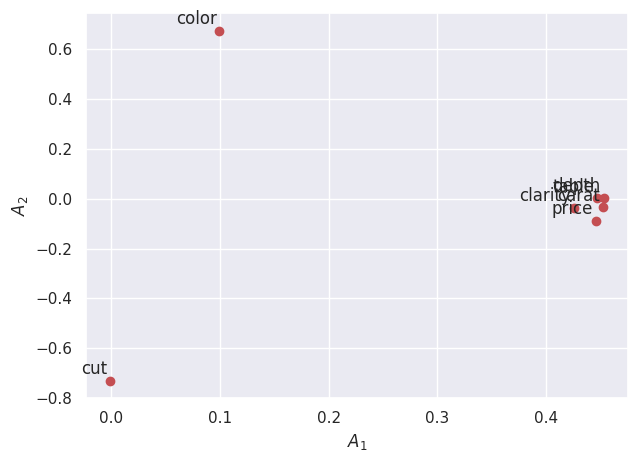

In [21]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

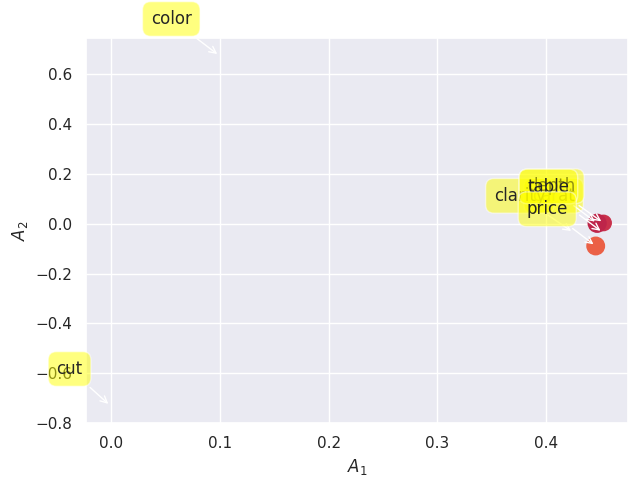

In [22]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

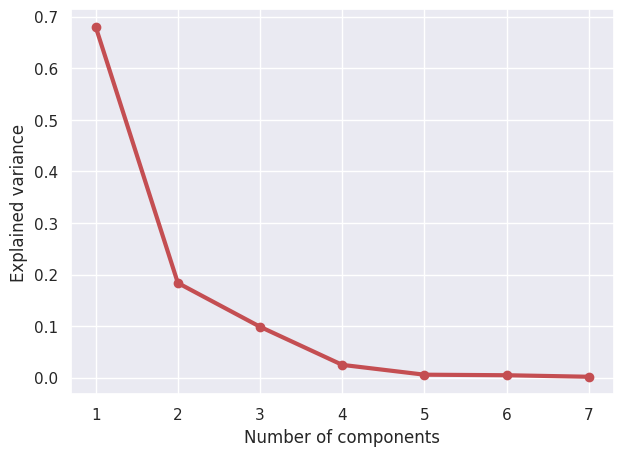

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

In [26]:
Lambda

array([4.76400313, 1.28589192, 0.69082407, 0.17375655, 0.04030797,
       0.0329472 , 0.01239894])

In [24]:
A

array([[ 0.45244549, -0.03469601, -0.00549481, -0.06835945, -0.13399948,
        -0.76815114,  0.42588029],
       [-0.00091613, -0.73067971,  0.67282929, -0.047248  ,  0.08873829,
        -0.01445027, -0.05560026],
       [ 0.09951609,  0.67506738,  0.72806947, -0.0595406 ,  0.01037614,
         0.02526831, -0.00204926],
       [ 0.42551927, -0.03525794, -0.10544948, -0.84977817,  0.05377206,
         0.27330947, -0.08281429],
       [ 0.45321251,  0.00351255, -0.03950882,  0.24299509, -0.08898016,
        -0.19846061, -0.82865822],
       [ 0.4472649 ,  0.00215791, -0.05418879,  0.32846061,  0.77405793,
         0.21526655,  0.20885709],
       [ 0.44595366, -0.08903518,  0.03960344,  0.31700727, -0.60339656,
         0.4986704 ,  0.27995794]])

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

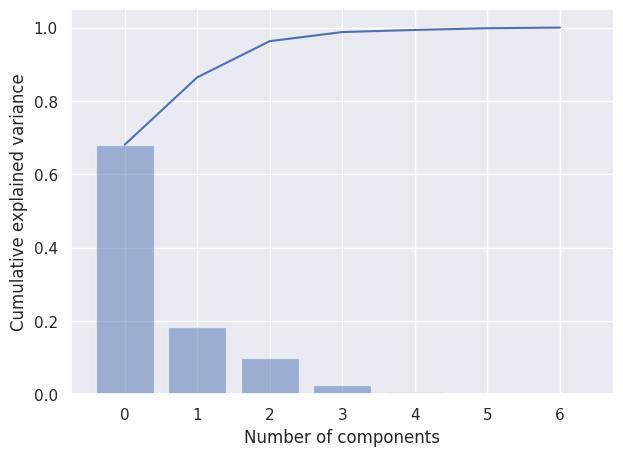

In [27]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

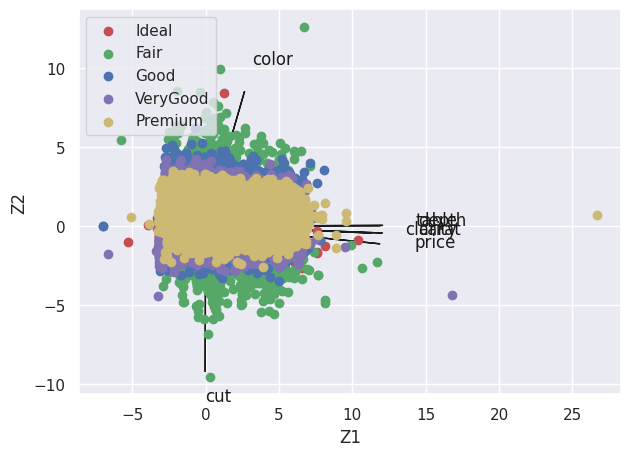

In [28]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Ideal,0], Z[idx_Ideal,1], c='r', label='Ideal')
plt.scatter(Z[idx_Fair,0], Z[idx_Fair,1], c='g', label='Fair')
plt.scatter(Z[idx_Good,0], Z[idx_Good,1], c='b', label='Good')
plt.scatter(Z[idx_VeryGood,0], Z[idx_VeryGood,1], c='m', label='VeryGood')
plt.scatter(Z[idx_Premium,0], Z[idx_Premium,1], c='y', label='Premium')

plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0     -3.143456 -0.410706 -0.732095
1     -3.049138  2.285196  0.426760
2     -2.695226  4.972220  0.351300
3     -2.627002  0.008168  0.657749
4     -2.428992 -0.466811  1.076289
...         ...       ...       ...
53935 -0.226451  0.367198 -0.566921
53936 -0.275640 -1.424197 -0.129628
53937 -0.142984  0.246935  1.360456
53938  0.405843  0.528711 -0.166478
53939 -0.123915 -0.970482 -0.561605

[53940 rows x 3 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.77%] of the variance'}, xlabel='PC1 (68.0% expl.var)', ylabel='PC2 (18.3% expl.var)'>)

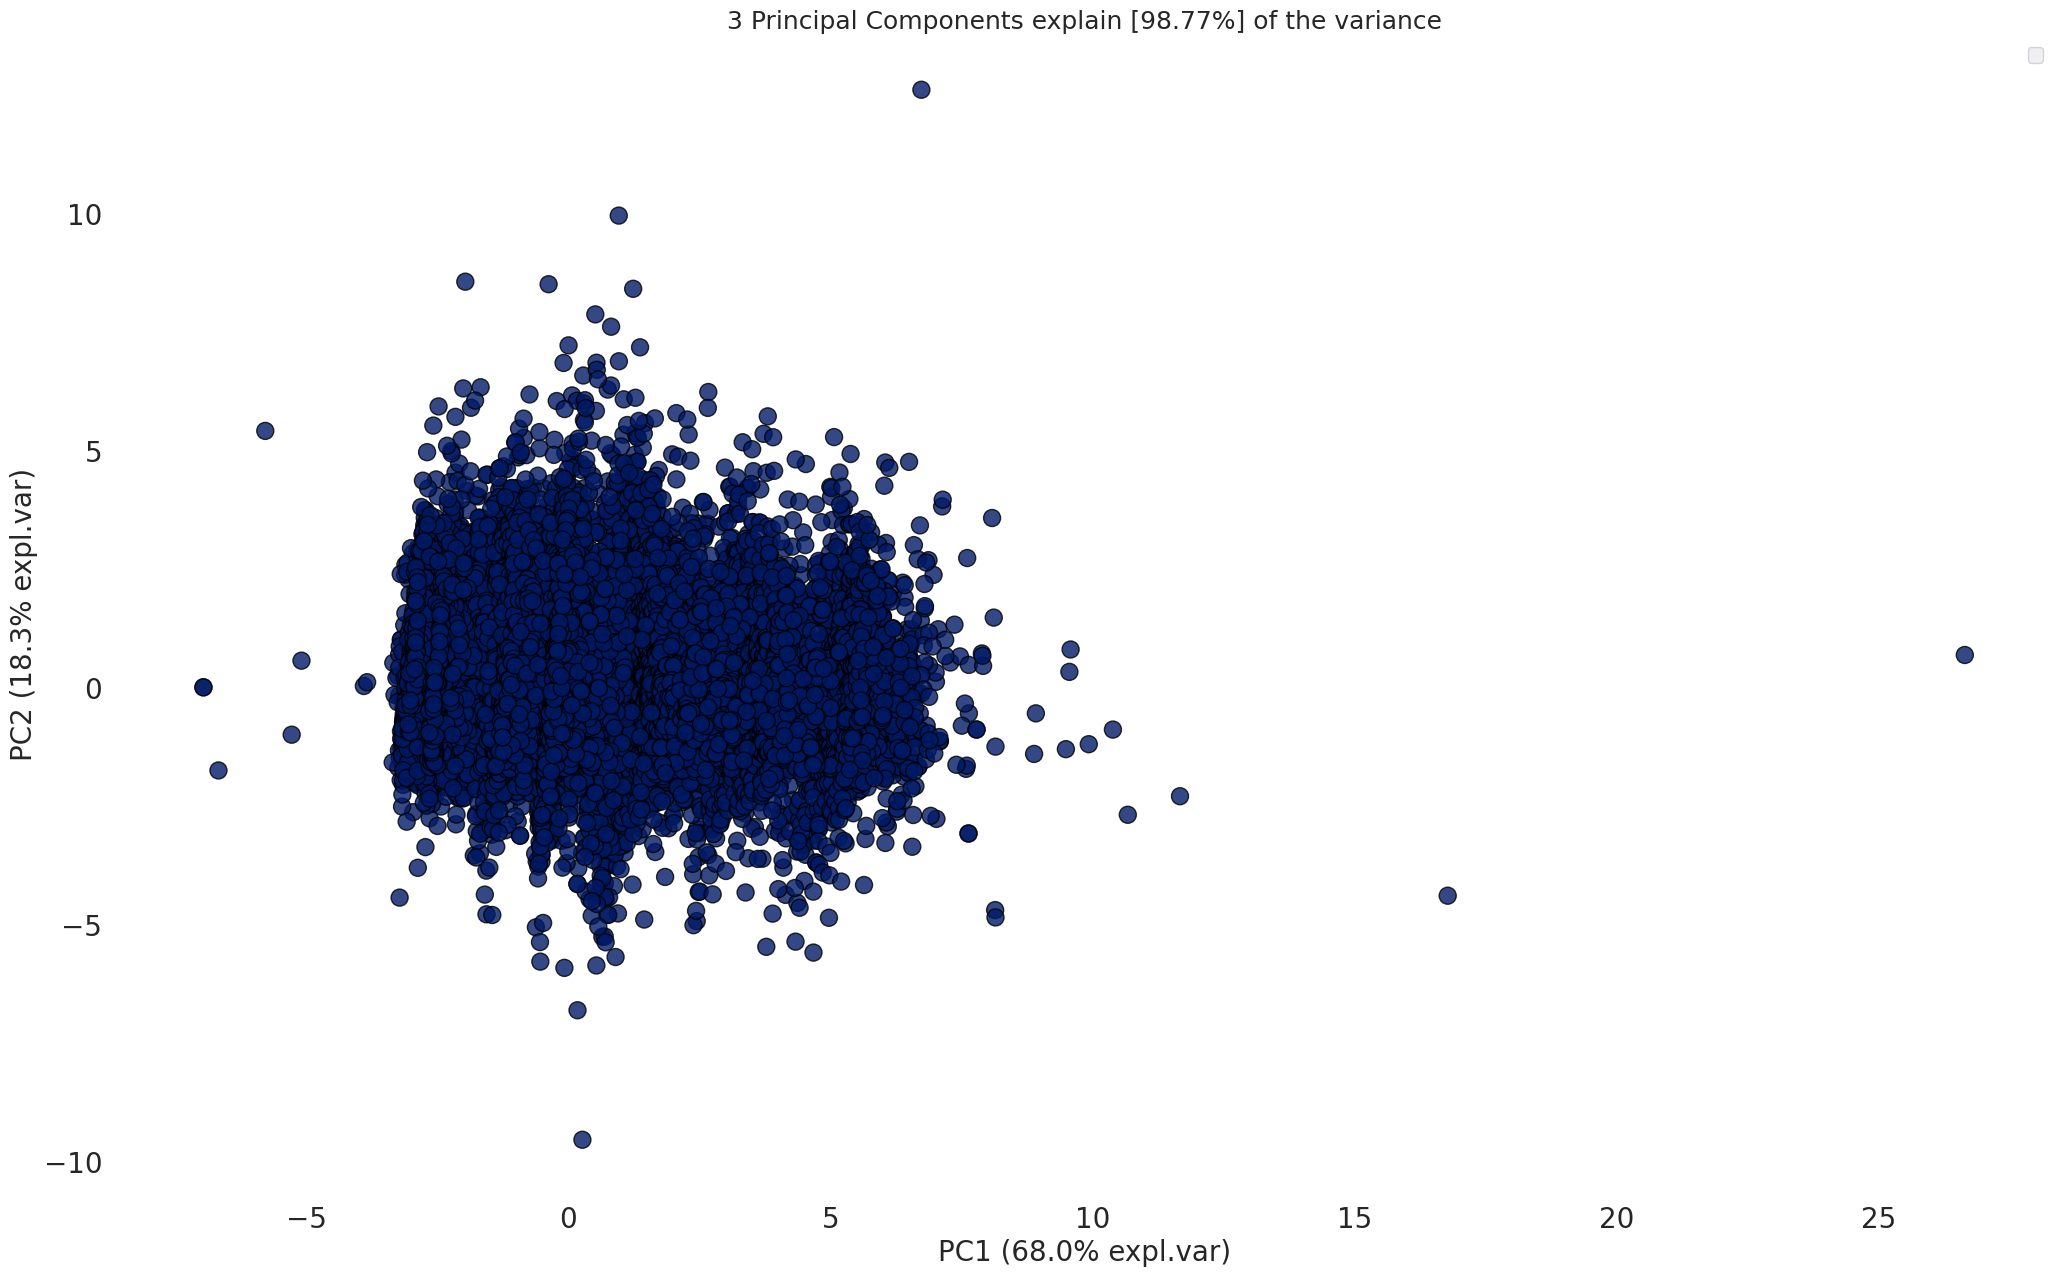

In [ ]:
model.scatter(label=True, legend=True)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

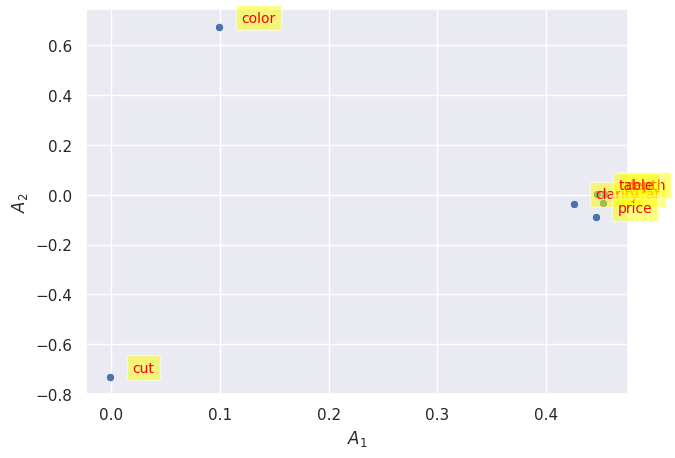

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

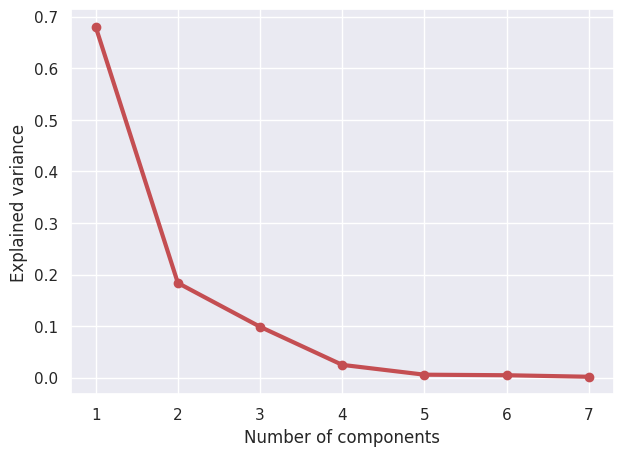

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

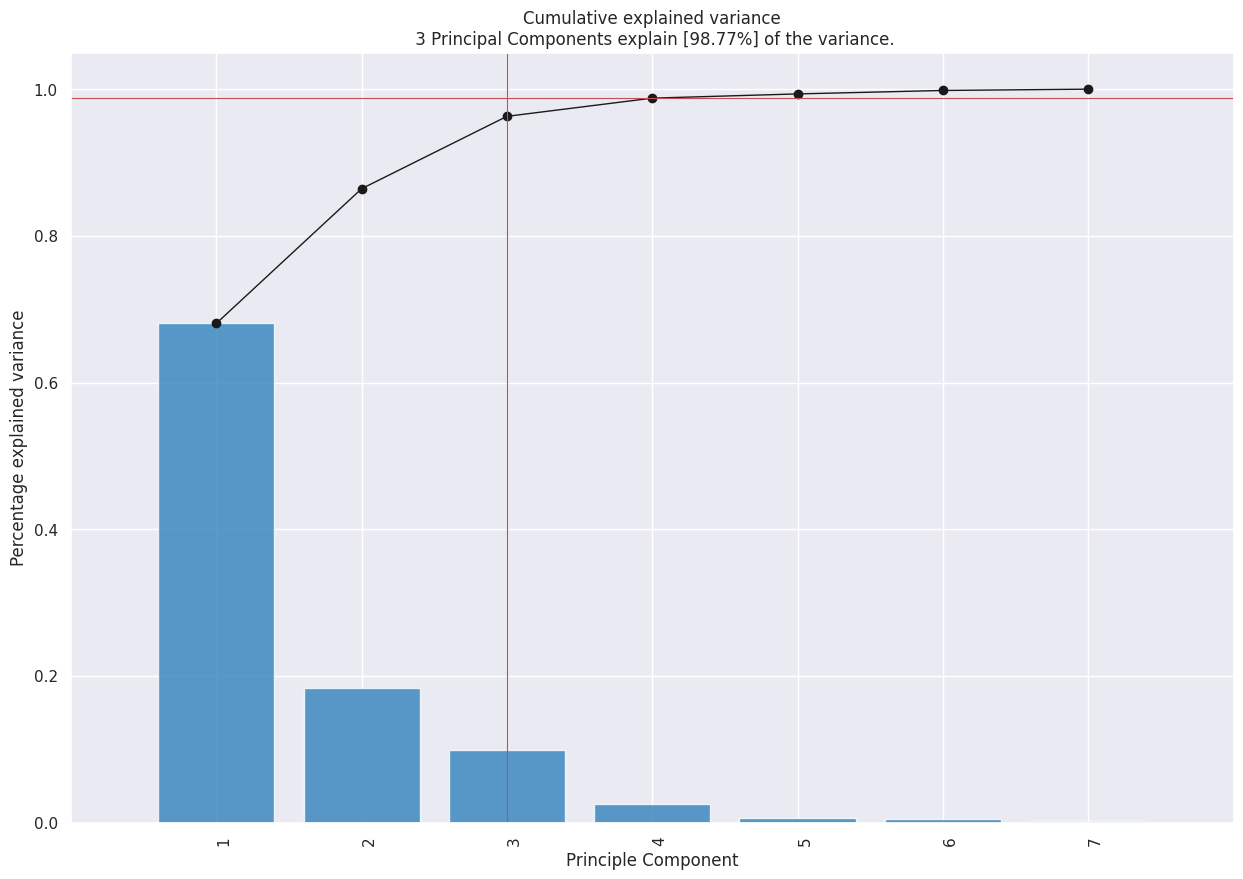

<Figure size 700x500 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


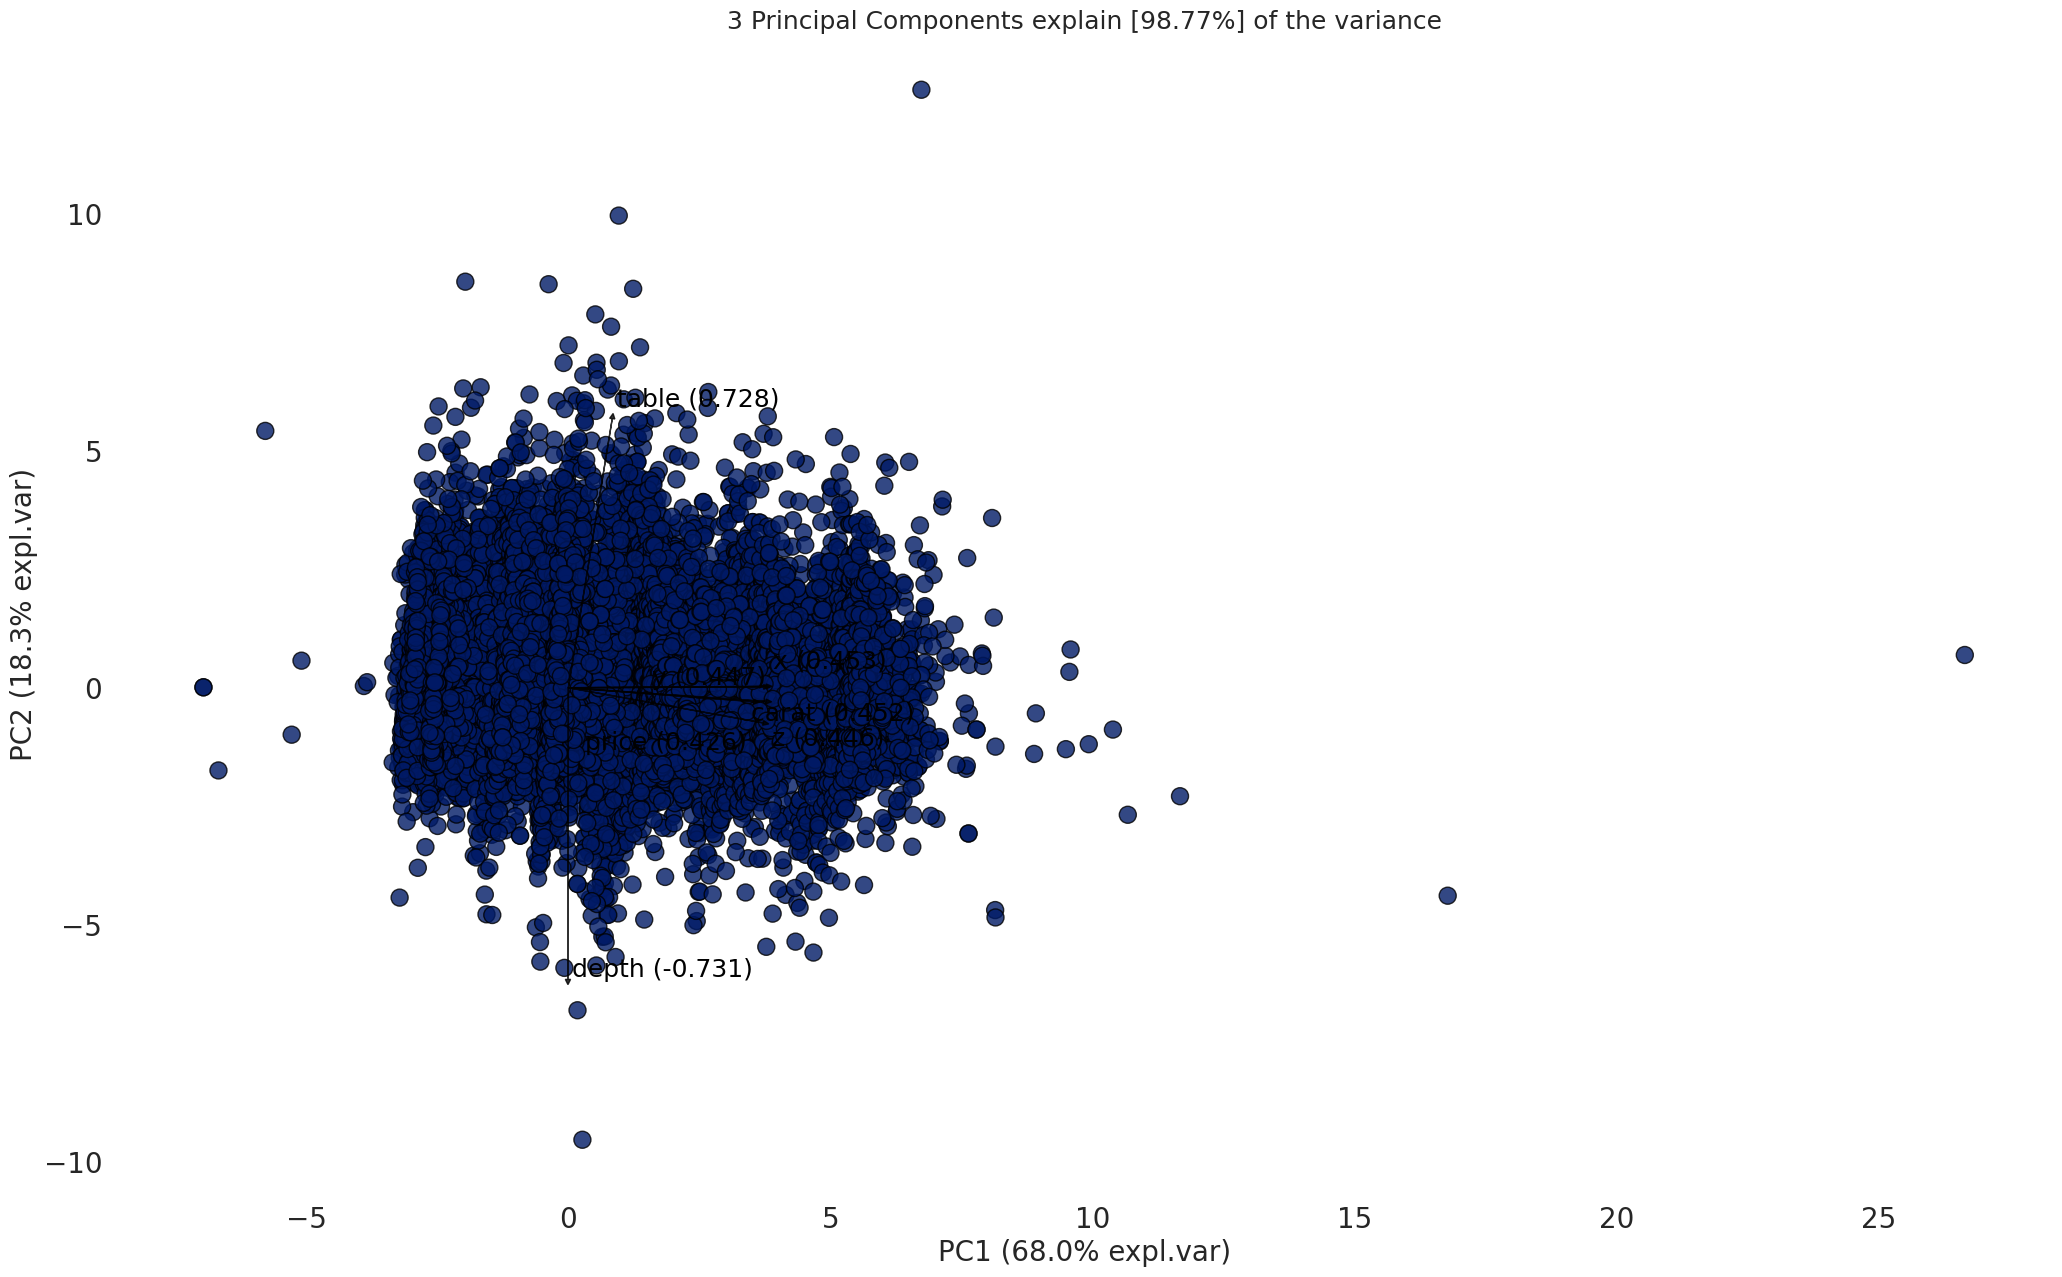

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.77%] of the variance'}, xlabel='PC1 (68.0% expl.var)', ylabel='PC2 (18.3% expl.var)'>)

In [ ]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook. The enable_colab() function in PyCaret is used to install and configure all the necessary dependencies to use PyCaret in Google Colab.

In [29]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

ImportError: ignored

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [30]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (48546, 10)
Unseen Data For Predictions: (5394, 10)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [31]:
from pycaret.classification import *
clf = setup(data=data, target='cut', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing all Machine Learning Models**

In [32]:
 #show the best model and their statistics
 best_model = compare_models() 

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [33]:
best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [34]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7229  0.8715  0.7014  0.7258  0.6986  0.6039  0.6182
1       0.7382  0.8777  0.7006  0.7526  0.7134  0.6239  0.6401
2       0.7366  0.8760  0.7205  0.7436  0.7111  0.6232  0.6385
3       0.7293  0.8747  0.7051  0.7252  0.7030  0.6125  0.6262
4       0.7337  0.8737  0.6980  0.7335  0.7008  0.6159  0.6335
5       0.7345  0.8801  0.7029  0.7462  0.7029  0.6192  0.6383
6       0.7407  0.8794  0.7135  0.7473  0.7176  0.6295  0.6440
7       0.7319  0.8748  0.7165  0.7325  0.7036  0.6167  0.6325
8       0.7295  0.8715  0.7052  0.7308  0.7024  0.6128  0.6281
9       0.7366  0.8826  0.7178  0.7402  0.7037  0.6211  0.6390
Mean    0.7334  0.8762  0.7082  0.7378  0.7057  0.6179  0.6338
SD      0.0049  0.0035  0.0077  0.0090  0.0058  0.0069  0.0074

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [ ]:
#Update statmodels
#!pip3 install statsmodels --upgrade

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5246  0.7368  0.3759  0.4938  0.4942  0.3038  0.3108
1       0.5331  0.7416  0.3782  0.5012  0.5024  0.3151  0.3226
2       0.5353  0.7396  0.3695  0.4989  0.4985  0.3148  0.3245
3       0.5494  0.7406  0.3897  0.5191  0.5135  0.3350  0.3458
4       0.5212  0.7311  0.3604  0.4820  0.4823  0.2925  0.3020
5       0.5315  0.7333  0.3724  0.4974  0.4959  0.3101  0.3190
6       0.5232  0.7435  0.3584  0.4847  0.4897  0.3024  0.3093
7       0.5268  0.7363  0.3648  0.4882  0.4885  0.3024  0.3117
8       0.5283  0.7405  0.3667  0.4924  0.4950  0.3076  0.3154
9       0.5362  0.7427  0.3767  0.5039  0.5022  0.3167  0.3254
Mean    0.5310  0.7386  0.3713  0.4962  0.4962  0.3100  0.3186
SD      0.0078  0.0039  0.0089  0.0102  0.0082  0.0109  0.0115

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5287  0.7123  0.4212  0.5139  0.4982  0.3228  0.3325
1       0.5455  0.7180  0.4198  0.5255  0.5103  0.3426  0.3545
2       0.5383  0.7156  0.4302  0.5199  0.5007  0.3290  0.3423
3       0.5386  0.7173  0.4247  0.5211  0.5059  0.3340  0.3456
4       0.5350  0.7091  0.4226  0.5111  0.4957  0.3274  0.3403
5       0.5362  0.7098  0.4215  0.5104  0.4977  0.3278  0.3400
6       0.5415  0.7120  0.4424  0.5118  0.5027  0.3371  0.3493
7       0.5374  0.7085  0.4184  0.5119  0.4996  0.3306  0.3427
8       0.5365  0.7109  0.4262  0.5117  0.4985  0.3306  0.3429
9       0.5341  0.7193  0.4196  0.5126  0.4957  0.3233  0.3363
Mean    0.5372  0.7133  0.4247  0.5150  0.5005  0.3305  0.3427
SD      0.0042  0.0037  0.0068  0.0050  0.0044  0.0058  0.0059

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5487  0.7030  0.3252  0.4402  0.4374  0.3060  0.3476
1       0.5419  0.6954  0.3196  0.4214  0.4285  0.2944  0.3365
2       0.5418  0.6858  0.3201  0.4437  0.4292  0.2955  0.3362
3       0.5415  0.6957  0.3173  0.3991  0.4262  0.2895  0.3358
4       0.5533  0.6918  0.3283  0.4186  0.4423  0.3134  0.3546
5       0.5483  0.6717  0.3229  0.3580  0.4318  0.3028  0.3478
6       0.5415  0.6963  0.3197  0.4128  0.4360  0.2955  0.3328
7       0.5456  0.6963  0.3246  0.4334  0.4399  0.3041  0.3411
8       0.5418  0.6996  0.3209  0.4406  0.4407  0.2972  0.3331
9       0.5491  0.6986  0.3249  0.4056  0.4392  0.3072  0.3471
Mean    0.5453  0.6934  0.3223  0.4173  0.4351  0.3006  0.3413
SD      0.0040  0.0084  0.0032  0.0246  0.0054  0.0069  0.0072

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5499  0.6973  0.3264  0.4718  0.4372  0.3083  0.3504
1       0.5455  0.6704  0.3209  0.3557  0.4292  0.2985  0.3433
2       0.5409  0.6894  0.3180  0.4277  0.4263  0.2920  0.3347
3       0.5447  0.7022  0.3221  0.4392  0.4331  0.2989  0.3406
4       0.5562  0.6898  0.3299  0.4485  0.4420  0.3168  0.3610
5       0.5533  0.6936  0.3289  0.4481  0.4413  0.3151  0.3558
6       0.5436  0.6981  0.3217  0.4129  0.4342  0.2991  0.3380
7       0.5433  0.6689  0.3200  0.3546  0.4277  0.2950  0.3392
8       0.5465  0.6985  0.3244  0.4626  0.4415  0.3044  0.3427
9       0.5541  0.6960  0.3289  0.4455  0.4430  0.3151  0.3567
Mean    0.5478  0.6904  0.3241  0.4267  0.4355  0.3043  0.3462
SD      0.0050  0.0110  0.0040  0.0390  0.0060  0.0085  0.0086

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
tuned_lr

In [ ]:
evaluate_model(tuned_lr)

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9325  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.8571  0.9698  0.8500  0.8571  0.8571  0.7846  0.7846
2       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9733  0.8333  0.8901  0.8333  0.7636  0.7937
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9253  0.9859  0.9200  0.9399  0.9224  0.8866  0.8954
SD      0.0568  0.0208  0.0627  0.0468  0.0602  0.0867  0.0795

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8627  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9425  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9316  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9290  0.9167  0.9359  0.9211  0.8829  0.8911
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  0.9610  0.9450  0.9592  0.9462  0.9210  0.9275
SD      0.0468  0.0445  0.0522  0.0354  0.0494  0.0713  0.0642

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9286  1.0000  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9698  0.9991  0.9700  0.9758  0.9695  0.9546  0.9577
SD      0.0370  0.0026  0.0371  0.0296  0.0374  0.0557  0.0519

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 11
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [37]:
clf_pca = setup(data=df, target='cut', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [38]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [39]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Tune the Best Model**

In [40]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
tuned_best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

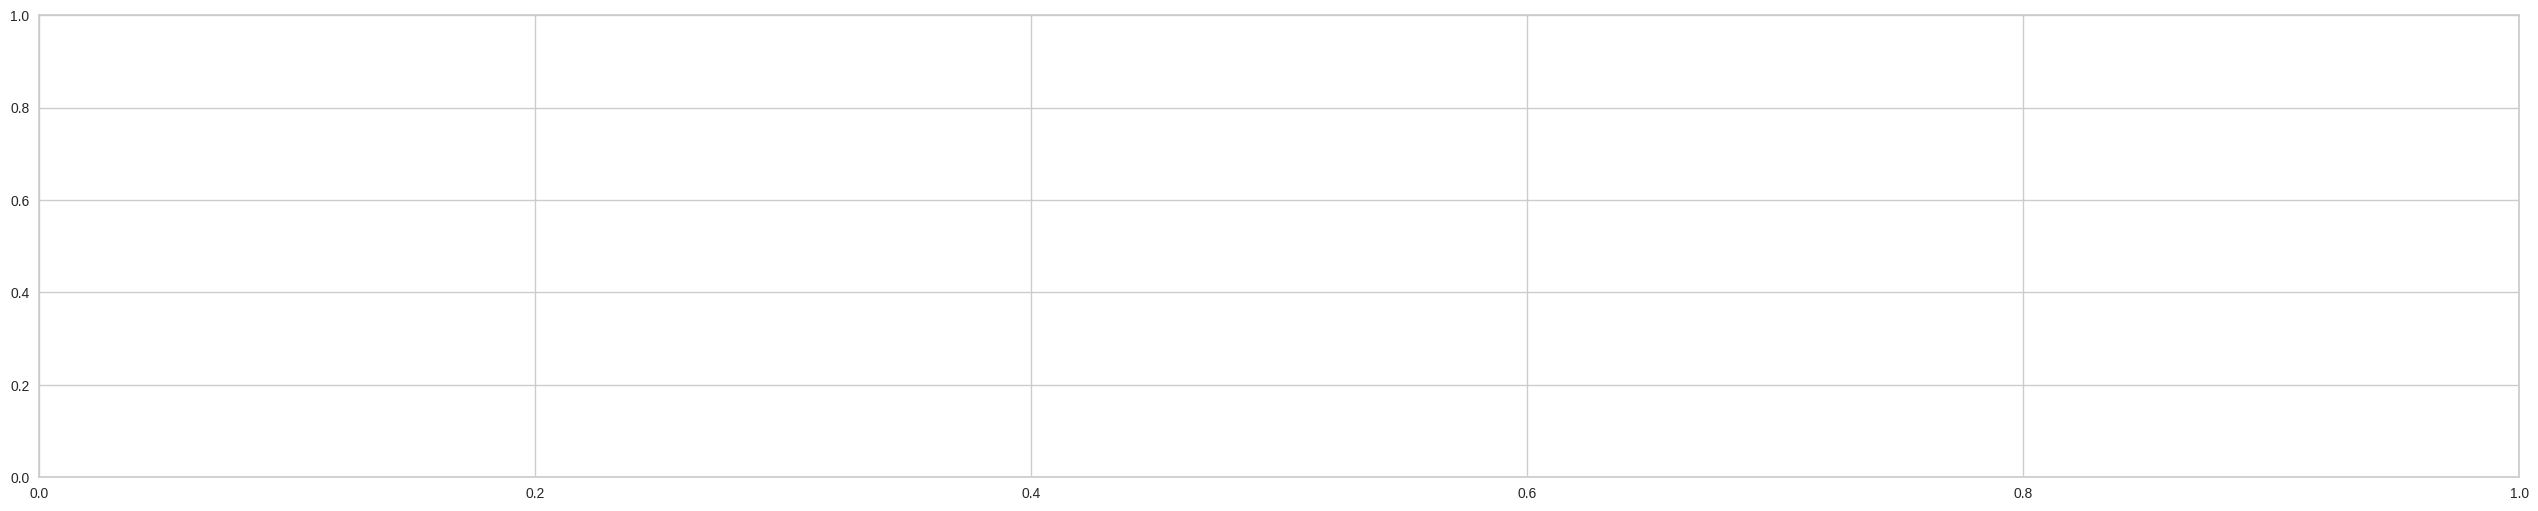

In [52]:
evaluate_model(tuned_best_model_pca)

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties. 

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [53]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [45]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

In [57]:
interpret_model(tuned_rf_pca, plot='summary')

ModuleNotFoundError: ignored

In [58]:
!pip install git+https://github.com/slundberg/shap.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/slundberg/shap.git to /tmp/pip-req-build-kctpjb1n
  Running command git clone --filter=blob:none --quiet https://github.com/slundberg/shap.git /tmp/pip-req-build-kctpjb1n
  Resolved https://github.com/slundberg/shap.git to commit 45b85c1837283fdaeed7440ec6365a886af4a333
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')